In [46]:
import os
from datetime import datetime

# Specify the folder containing the files
folder_path = "Z:\\Lab Data\\D52_Calibration_Ba137\\New_initialized_calibration_freq_files"

# Specify the output file
output_file = "filtered_pi_time_data.txt"

# Initialize a list to store the data
filtered_data = []

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Ensure we are only processing files (not directories)
    if os.path.isfile(file_path):
        with open(file_path, "r") as file:
            lines = file.readlines()

            # Check if the file has exactly 7 lines
            if len(lines) == 7:
                # Extract the middle value (2nd column) from each line
                middle_values = [float(line.split(",")[1].strip()) for line in lines]

                # Get the last modified date
                modified_time = os.path.getmtime(file_path)
                formatted_date = datetime.fromtimestamp(modified_time).strftime("%Y-%m-%d %H:%M:%S")

                # Store the data with the date
                filtered_data.append((formatted_date, middle_values))

# Save the filtered data to the output file
with open(output_file, "w") as out_file:
    for date, data in filtered_data:
        out_file.write(f"{date}, {data}\n")

print(f"Filtered data saved to {output_file}")


Filtered data saved to filtered_pi_time_data.txt


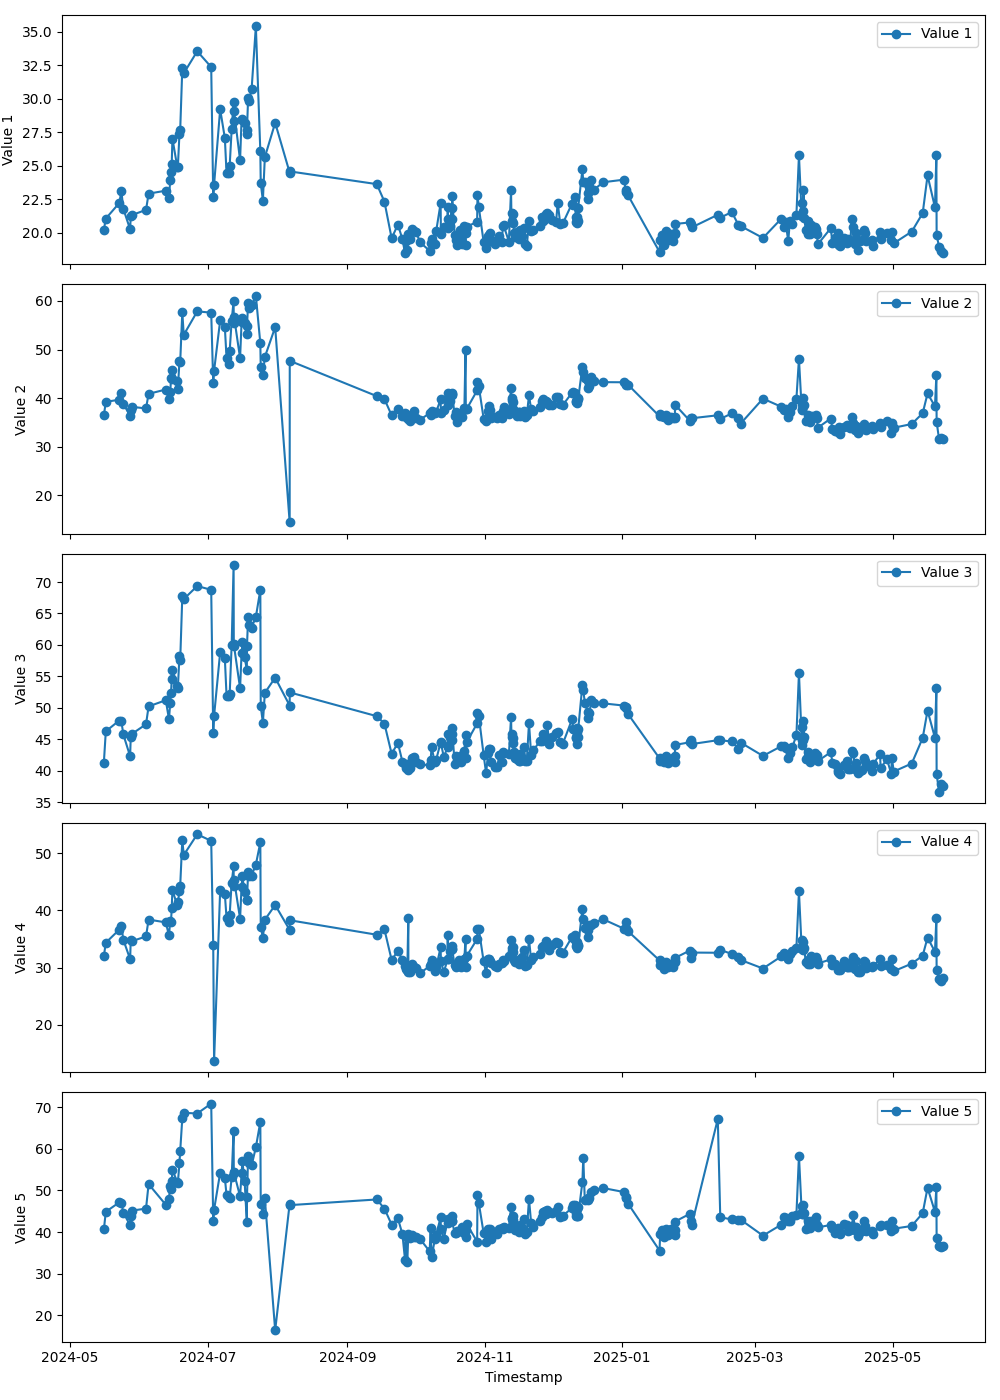

In [48]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime
from statistics import median

# Specify the input file containing the filtered data
input_file = "filtered_pi_timee_data.txt"

# Initialize lists to store datetime and data
timestamps = []
all_data = []

# Read the file and parse the date + data
with open(input_file, "r") as file:
    for line in file:
        date_str, data_str = line.strip().split(",", 1)
        timestamp = datetime.strptime(date_str.strip(), "%Y-%m-%d %H:%M:%S")
        data_list = ast.literal_eval(data_str.strip())
        timestamps.append(timestamp)
        all_data.append(data_list)

# Calculate the median for each of the last 5 indices
num_indices = 5
medians = [median([data[-5:][i] for data in all_data]) for i in range(num_indices)]

# Filter out lists where any of the last 5 data points deviate from their respective median by more than 30
filtered_data = []
filtered_timestamps = []
for ts, data in zip(timestamps, all_data):
    last_5 = data[-5:]
    if all(abs(medians[i] - last_5[i]) <= 30 for i in range(num_indices)):
        filtered_data.append(last_5)
        filtered_timestamps.append(ts)

# Plot each of the last 5 numbers in separate subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 14), sharex=True)

for i in range(5):
    values = [data[i] for data in filtered_data]
    axes[i].plot(filtered_timestamps, values, marker="o", linestyle="-", label=f"Value {i + 1}")
    axes[i].set_ylabel(f"Value {i + 1}")
    axes[i].legend()

axes[-1].set_xlabel("Timestamp")
plt.tight_layout()
plt.show()


In [36]:
%matplotlib widget

In [79]:
from datetime import datetime
import bisect

# Step 1: Read and parse d_values_date_time.txt
d_values_date_time = {}
with open('d_values_date_time.txt', 'r') as f:
    current_d = None
    for line in f:
        line = line.strip()
        if not line:
            continue
        if not line.startswith(' '):  # d_value line
            current_d = line.rstrip(':')
            d_values_date_time[current_d] = []
        else:  # date-time line
            dt = datetime.strptime(line.strip(), '%Y-%m-%d %H:%M:%S')
            d_values_date_time[current_d].append(dt)
print(d_values_date_time)
# Step 2: Load filtered_pi_time_data.txt
pi_time_data = []
with open('filtered_pi_time_data.txt', 'r') as f:
    for line in f:
        dt_str, values_str = line.strip().split(',', 1)
        dt = datetime.strptime(dt_str.strip(), '%Y-%m-%d %H:%M:%S')
        values = eval(values_str.strip())  # trusted format assumption
        pi_time_data.append((dt, values))

# Step 3: Find closest earlier or equal pi_time for each d_value's date_times
pi_times_dates = [dt for dt, _ in pi_time_data]
closest_pi_times = {}

for d_value, dt_list in d_values_date_time.items():
    result = []
    for dt in dt_list:
        idx = bisect.bisect_right(pi_times_dates, dt) - 1
        if idx >= 0:
            result.append((pi_times_dates[idx], pi_time_data[idx][1]))
    closest_pi_times[d_value] = result

# Optional: Save results to file
with open('closest_pi_times.txt', 'w') as f:
    for d_value, entries in closest_pi_times.items():
        f.write(f"{d_value}:\n")
        for dt, vals in entries:
            f.write(f"  {dt}: {vals}\n")


{'17': [], '2025-04-15 17:21:00': [], '2025-04-15 23:23:00': [], '2025-04-16 02:10:00': [], '2025-04-16 04:45:00': [], '2025-04-16 07:27:00': [], '2025-04-15 18:21:00': [], '2025-04-16 22:20:00': [], '2025-04-17 09:11:00': [], '2025-04-17 15:59:00': [], '2025-04-17 19:18:00': [], '2025-04-18 15:16:00': [], '2025-04-18 19:19:00': [], '2025-04-18 19:43:00': [], '2025-04-18 22:50:00': [], '2025-04-18 23:16:00': [], '2025-05-20 23:26:00': [], '2025-05-20 23:51:00': [], '16': [], '2025-04-16 18:18:00': [], '2025-04-16 22:08:00': [], '2025-04-17 09:01:00': [], '2025-04-17 15:47:00': [], '2025-04-17 19:05:00': [], '2025-04-18 15:02:00': [], '2025-04-18 19:07:00': [], '2025-04-18 19:32:00': [], '2025-04-18 22:39:00': [], '2025-04-18 23:03:00': [], '2025-05-20 22:56:00': [], '2025-05-20 23:37:00': [], '15': [], '2025-04-15 20:42:00': [], '2025-04-16 18:07:00': [], '2025-04-16 21:55:00': [], '2025-04-17 08:47:00': [], '2025-04-17 15:35:00': [], '2025-04-17 18:52:00': [], '2025-04-18 14:48:00': [

In [75]:
from datetime import datetime
import bisect

# --- Step 1: Load d_values_date_time.txt ---
d_values_date_time = {}
with open('d_values_date_time.txt', 'r') as f:
    current_d = None
    for line in f:
        line = line.strip()
        if not line:
            continue
        if not line.startswith(' '):  # New d_value line
            current_d = line.rstrip(':')
            d_values_date_time[current_d] = []
        else:  # Datetime entry
            dt = datetime.strptime(line.strip(), '%Y-%m-%d %H:%M:%S')
            d_values_date_time[current_d].append(dt)

# print(d_values_date_time)

# --- Step 2: Load filtered_pi_time_data.txt ---
pi_time_data = []
with open('filtered_pi_time_data.txt', 'r') as f:
    for line in f:
        dt_str, values_str = line.strip().split(',', 1)
        dt = datetime.strptime(dt_str.strip(), '%Y-%m-%d %H:%M:%S')
        values = eval(values_str.strip())  # trusted input
        pi_time_data.append((dt, values))
print(pi_time_data)
pi_time_datetimes = [entry[0] for entry in pi_time_data]

# --- Step 3: For each d_value, map to a list of closest (past) PI time lists ---
d_value_to_pi_lists = {}

for d_value, dt_list in d_values_date_time.items():
    matched_lists = []
    for dt in dt_list:
        idx = bisect.bisect_right(pi_time_datetimes, dt) - 1
        if idx >= 0:
            print('pass')
            matched_lists.append(pi_time_data[idx][1])
    d_value_to_pi_lists[d_value] = matched_lists
    # print(matched_lists)
# # --- Optional: Save the final result ---
# with open('d_value_to_pi_lists.txt', 'w') as f:
#     for d_value, lists in d_value_to_pi_lists.items():
#         f.write(f"{d_value}:\n")
#         for values in lists:
#             f.write(f"  {values}\n")


[(datetime.datetime(2024, 3, 15, 8, 15, 15), [59.488, 164.274, 64.414, 331.186, 85.497, 102.467, 432.014]), (datetime.datetime(2024, 4, 4, 15, 26, 19), [23.069, 58.996, 54.723, 64.217, 70.039, 73.166, 81.332]), (datetime.datetime(2024, 4, 8, 16, 4, 45), [24.476, 60.733, 21.142, 64.813, 24.246, 41.629, 80.641]), (datetime.datetime(2024, 4, 9, 12, 53, 4), [23.697, 60.009, 21.031, 61.661, 23.058, 42.94, 77.398]), (datetime.datetime(2024, 4, 18, 1, 8, 20), [51.886, 22.104, 18.495, 52.449, 21.616, 37.972, 74.052]), (datetime.datetime(2024, 4, 18, 12, 10, 36), [59.102, 24.396, 20.979, 62.911, 23.619, 45.136, 75.066]), (datetime.datetime(2024, 4, 22, 20, 26, 39), [64.169, 26.892, 21.079, 67.52, 25.058, 43.749, 81.812]), (datetime.datetime(2024, 4, 23, 11, 39, 29), [63.733, 24.888, 21.581, 63.158, 24.263, 45.455, 82.596]), (datetime.datetime(2024, 4, 24, 15, 33, 11), [57.935, 23.816, 20.965, 60.239, 23.461, 41.301, 78.15]), (datetime.datetime(2024, 4, 26, 0, 36, 33), [66.915, 27.634, 184.749, 

In [115]:
from datetime import datetime
import bisect
import numpy as np
d_values_date_time = {}
with open('d_values_date_time.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        if ':' in line and not line.startswith('2025'):  # d_value line (like '17:')
            d_value = line.rstrip(':')
            d_values_date_time[d_value] = []
        elif line.startswith('2025'):  # datetime line
            dt = datetime.strptime(line, '%Y-%m-%d %H:%M:%S')
            d_values_date_time[d_value].append(dt)
# print()
# --- Step 2: Load filtered_pi_time_data.txt ---
pi_time_data = []
with open('filtered_pi_time_data.txt', 'r') as f:
    for line in f:
        dt_str, values_str = line.strip().split(',', 1)
        dt = datetime.strptime(dt_str.strip(), '%Y-%m-%d %H:%M:%S')
        values = eval(values_str.strip())  # assumes trusted format
        pi_time_data.append((dt, values))

pi_time_datetimes = [dt for dt, _ in pi_time_data]

# --- Step 3: For each d_value and datetime, find closest past PI data ---
d_value_to_pi_lists = {}

for d_value, dt_list in d_values_date_time.items():
    matched_lists = []
    print(d_value)
    for dt in dt_list:
        idx = bisect.bisect_right(pi_time_datetimes, dt) - 1
        print(idx)
        if idx >= 0:
            matched_lists.append(pi_time_data[idx][1][2:])
    d_value_to_pi_lists[d_value] = matched_lists

d_value_avg = {}

for d_value, list_of_lists in d_value_to_pi_lists.items():
    array = np.array(list_of_lists)
    avg = np.mean(array, axis=0)
    d_value_avg[d_value] = avg.tolist()


17
248
249
249
249
249
248
250
251
251
251
252
253
253
253
253
268
268
16
248
249
249
249
249
248
250
250
251
251
251
252
253
253
253
253
268
268
15
248
249
249
249
249
249
250
250
251
251
251
252
253
253
268
14
248
249
249
249
249
249
250
250
251
251
251
251
252
253
253
268
13
249
249
249
249
249
250
250
251
251
251
251
252
253
253
268
12
249
249
249
249
249
250
250
251
251
251
251
252
253
253
268
11
249
249
249
249
249
250
250
251
251
251
251
252
252
253
253
268
10
249
249
249
249
249
250
250
251
251
251
251
252
252
253
253
268
9
249
249
249
249
249
250
250
251
251
251
251
252
252
253
268
8
249
249
249
249
250
250
250
251
251
251
251
251
252
253
268
7
249
249
249
249
249
250
250
250
251
251
251
251
252
253
268
6
249
249
249
249
249
250
250
250
251
251
251
251
252
253
268
5
249
249
249
249
249
249
249
250
250
251
251
251
251
253
268
4
249
249
249
249
249
249
250
250
251
251
251
251
253
268
3
249
249
249
249
249
249
250
250
251
251
251
251
253
268
2
249
249
249
249
249
250
250
251
251


In [117]:
d_value_avg

{'17': [19.557176470588235,
  33.87870588235294,
  40.488294117647065,
  30.114705882352933,
  40.29382352941177],
 '16': [19.548777777777776,
  33.87105555555556,
  40.458111111111116,
  30.06483333333333,
  40.27644444444444],
 '15': [19.391266666666663,
  33.648466666666664,
  40.29259999999999,
  29.873733333333327,
  40.0978],
 '14': [19.39725,
  33.6466875,
  40.283812499999996,
  29.87956249999999,
  40.114999999999995],
 '13': [19.357866666666666,
  33.602266666666665,
  40.226800000000004,
  29.800199999999993,
  40.04166666666666],
 '12': [19.357866666666666,
  33.602266666666665,
  40.226800000000004,
  29.800199999999993,
  40.04166666666666],
 '11': [19.4086875,
  33.6764375,
  40.336749999999995,
  29.882687499999992,
  40.207249999999995],
 '10': [19.4086875,
  33.6764375,
  40.336749999999995,
  29.882687499999992,
  40.207249999999995],
 '9': [19.371533333333332,
  33.644666666666666,
  40.25993333333333,
  29.81619999999999,
  40.129933333333334],
 '8': [19.3706,
  33